In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
f = lambda x: x*3-0.5

In [6]:
class Point:
    def __init__(self, x, y):
        self.pos = [x, y, 1]
        if f(x) > y:
            self.g = 1
        else:
            self.g = -1

In [8]:
class Perceptron:
    def __init__(self, func):
        self.weights = np.random.rand(3)*2-1
        self.func = func

    # out: int
    def forward(self, input):
        sum = 0
        for i, w in enumerate(self.weights):
            sum += w * input[i]
        return self.func(sum)

    def train(self, examples, lr=0.01):
        for pt in examples:
            out = self.forward(pt.pos)
            err = pt.g - out
            for i in range(len(self.weights)):
                self.weights[i] += err * pt.pos[i] * lr


In [9]:
def activation(x):
    if x >= 0:
        return 1
    return -1

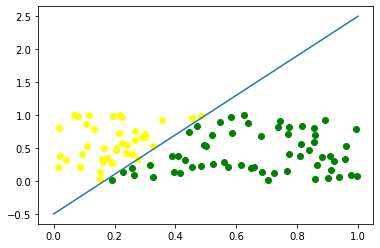

In [11]:
perc = Perceptron(activation)
points = np.random.rand(10000, 2)
examples = []

for pt in points:
    examples.append(Point(pt[0], pt[1]))

perc.train(examples)

for _ in np.random.rand(100, 2):
    pt = Point(_[0], _[1])
    out = perc.forward(pt.pos)

    c = "red"
    if pt.g == out:
        if out == 1:
            c = "green"
        else:
            c = "yellow"

    plt.plot(pt.pos[0], pt.pos[1], "o", c=c)

space = np.linspace(0, 1)
plt.plot(space, f(space))

plt.show()